Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

#### Always start with imports

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

## Part 1: Simple Examples 

### 1.1 Concatenate
Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, `df1` and `df2`.

In [141]:
# Create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [142]:
# Create df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [143]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. Note that 'axis=0' is the default and doesn't have to be specified.
df3=pd.concat([df1, df2], axis=0) 
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [144]:
# Finally, let's stick the dataframes next to each other using `concat`. 
# Here, `axis=1` indicates a column operation.
df4=pd.concat([df1, df2], axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


### 1.2 Merge

Merging joins two datasets together based on a common key.

In [145]:
# stock names
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [146]:
# stock prices.
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [147]:
# Merge these dataframes.
named_stocks=pd.merge(openprice,  stockname)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [148]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


The 'on' parameter indicates a specific column that is contained in both dataframes. We use it to look up and copy information from the two df's into a combined df.

In [149]:
# Now merge that with the named stocks.
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='outer')
# full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='left')
# full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='inner')
# full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='right')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


The 'how' parameter indicates what the portion of the selected dataframes to keep after the merge takes place.  
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

In [150]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

### 1.3 Reshaping Datasets: `melt` and `pivot_table`



Why reshape data?

**Some libraries prefer data in different formats**



> For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).  
[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets)    
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

**Hadley Wickham: 'wide' format vs. 'tidy' format**  
From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
# Let's create a simple table.

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.   
The table has two columns and three rows, and both rows and columns are labelled."

In [152]:
# This is an example of 'wide' format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data.   
Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [153]:
# Exactly the same information can be displayed by transposing the table. 
# (this is also another form of 'wide' format)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Table 3 is an example of 'tidy' format. It reorganises Table 1  to make the values, variables and obserations more clear.

Table 3 is the 'tidy' version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

**Table 1 --> Tidy**

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [154]:
# First, get the column names as a list.
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [155]:
# Now get the index values as another list.
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [156]:
# For table 1, convert the index into a column using the `reset_index` method.
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [157]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [158]:
# rename the columns
tidy = tidy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
# shorten the `trt` values
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Table 2 --> Tidy**

In [0]:
##### LEAVE BLANK --an assignment exercise #####

**Tidy --> Table 1**

The `pivot_table` function is the inverse of `melt`.

In [160]:
# Let's do it all in reverse.
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Tidy --> Table 2**

In [0]:
##### LEAVE BLANK --an assignment exercise #####

**Seaborn example**

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

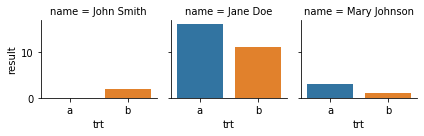

In [162]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Part 2: More complex examples 

### 2.1 Concatenating time-series datasets from Chicago

In [0]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [164]:
# Let's take a look at the first quarter.
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [165]:
# how about the second quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [166]:
# Do they have exactly the same columns?
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [167]:
# Let's define a function to check if they're REALLY equal.
def difference_checker(list1, list2):
    difference = list(set(list1) - set(list2))
    print ('The difference is: ', difference)

difference_checker(q1.columns, q2.columns)

The difference is:  []


In [168]:
# Now we're sure they're equal, let's concatenate them.
q1_q2=pd.concat([q1, q2], axis=0)
q1_q2.shape

(2000, 12)

In [169]:
# Confirm that did what we wanted it to.
print(q1.shape)
print(q2.shape)
print(q1_q2.shape)

(1000, 12)
(1000, 12)
(2000, 12)


In [170]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

allbikes=pd.concat([q1, q2, q3, q4], axis=0)
print(allbikes.shape)
allbikes.sample(4)

(4000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
525,5651583,6/15/2015 14:26,6/15/2015 14:45,3229,1107,383,Ashland Ave & Harrison St,183,Damen Ave & Augusta Blvd,Customer,NaN,NaN
111,7852308,10/9/2015 8:37,10/9/2015 8:49,3698,682,337,Clark St & Chicago Ave,77,Clinton St & Madison St,Subscriber,Female,1986.0
903,8093199,10/26/2015 21:14,10/26/2015 21:24,311,621,374,Western Ave & Walton St,116,Western Ave & Winnebago Ave,Subscriber,Male,1956.0
520,4713692,3/27/2015 16:35,3/27/2015 16:47,67,728,148,State St & 33rd St,339,Emerald Ave & 31st St,Subscriber,Male,1991.0


### 2.2 Merging datasets about counties
Original sources:  
https://www.kaggle.com/muonneutrino/us-census-demographic-data/download  
https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [0]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [172]:
# Read that into Pandas, and check out 5 rows.
census=pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3141,56045,Wyoming,Weston County,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2
1689,31071,Nebraska,Garfield County,1958,970,988,2.1,96.6,0.2,0.0,0.3,0.0,1572,46509,3659,25856,2259,7.2,5.3,34.6,16.6,20.8,14.5,13.5,72.6,5.1,0.5,8.7,2.1,11.0,11.5,1006,62.5,17.2,19.6,0.7,1.9
2170,40079,Oklahoma,Le Flore County,49860,25028,24832,6.8,71.9,2.3,10.1,0.4,0.1,36569,39253,1159,20264,708,22.2,29.7,26.0,19.4,20.8,16.1,17.7,85.7,9.3,0.1,1.5,1.1,2.3,24.2,18689,74.3,18.9,6.4,0.4,6.9
703,18013,Indiana,Brown County,15007,7439,7568,1.6,95.9,0.5,0.0,0.7,0.0,12173,59292,5009,31365,3149,10.6,10.1,33.3,15.2,24.5,11.5,15.4,85.6,8.4,0.2,1.1,0.2,4.5,33.3,6754,80.8,8.8,9.9,0.5,5.9
2326,45021,South Carolina,Cherokee County,56549,27527,29022,4.1,73.1,19.9,0.1,0.6,0.1,42586,35286,2263,20516,1478,22.0,31.7,25.6,15.9,24.9,8.4,25.2,87.3,9.1,0.2,1.5,0.8,1.2,22.1,21599,82.7,12.7,4.1,0.4,7.8


In [173]:
# What are all the columns?
print(census.columns)

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


In [0]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
commute=census[['CountyId', 'State', 'County', 'MeanCommute']]

In [175]:
# What's the average commute in the USA?
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [177]:
# Take a look at that new data.
usda=pd.read_excel(source2)
usda.sample(5)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
876,19175,IA,Union County,12534,6,"Nonmetro - Urban population of 2,500 to 19,999..."
2088,39091,OH,Logan County,45858,6,"Nonmetro - Urban population of 2,500 to 19,999..."
737,18081,IN,Johnson County,139654,1,Metro - Counties in metro areas of 1 million p...
1827,35061,NM,Valencia County,76569,2,"Metro - Counties in metro areas of 250,000 to ..."
1968,37157,NC,Rockingham County,93643,2,"Metro - Counties in metro areas of 250,000 to ..."


In [178]:
# What are those RUCC codes all about?
usda.groupby('RUCC_2013')[['Description']].max()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [0]:
# Let's shrink that USDA data to just the columns we need.
usda=usda[['FIPS', 'RUCC_2013']]

In [180]:
# Let's merge that with our census data about commute times.
metro_commute=pd.merge(commute, usda, left_on='CountyId', right_on='FIPS', how='left')
metro_commute.sample(5)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
1845,36035,New York,Fulton County,25.0,36035.0,4.0
1401,28001,Mississippi,Adams County,18.9,28001.0,5.0
1183,23013,Maine,Knox County,17.4,23013.0,7.0
1638,30081,Montana,Ravalli County,22.8,30081.0,6.0
1800,35009,New Mexico,Curry County,14.3,35009.0,5.0


In [181]:
# Is there any difference in commutes by rural-urban designation?
drivetimes=metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


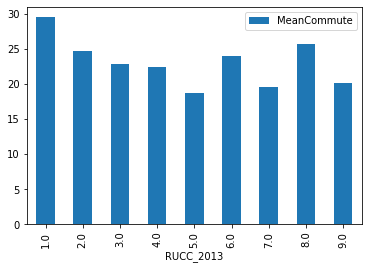

In [182]:
# Display that using the Pandas plotting function.
drivetimes.plot(kind='bar');

### 2.3. Instacart  Dataset: `pd.concat` and `pd.merge`

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [183]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-03 15:21:15--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  34.5MB/s    in 6.0s    

2019-11-03 15:21:21 (32.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [184]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [185]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [186]:
# bash command: list the contents of that folder.
!ls *.csv

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


**Goal: Reproduce this example**

The first two orders for user id 1:

In [187]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

#### Load data

Here's a list of all six CSV filenames

In [188]:
# List the contents of the cwd.
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [189]:
# Read in the aisles dataset. Do we need anything from here? No, we don't.
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [190]:
# Read in the departments dataset. Do we need anything from here? Nope.
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [191]:
# How about order_products? We need everything from this table except for reordered.
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [192]:
# How is this differen from the previous one? Same as above.
# This file indicates a user's most recent order.
# the suffix '__train' vs '__prior' indicates it's been split for machine learning (train-test split)
# Given a user's order history, can you predict what they'll order next.
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [193]:
# How is this one different? Does it have anything we need?
# We need most of these columns, except 'days_since_prior_order' and 'eval_set'
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [194]:
# And products? We need 'product_name' and 'product_id'
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [195]:
display(example)

#### Filtering: Get a subset of orders

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [196]:
# let's look at the `orders` dataframe.
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [197]:
# let's filter this dataframe to just the columns we need.
orders = orders[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']]
orders.head(3)

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12


In [198]:
# Now let's filter it to only certain rows. This will result in a series of boolean values.
condition = (orders['user_id'] == 1)
condition

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [199]:
# Apply that condition to the orders dataframe.
print(orders[condition].shape)
orders[condition]

(11, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [200]:
# a more complicated condition.
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)
condition

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [201]:
# Turn that filtered dataframe into its own dataframe.
orders_subset = orders[condition]
print(orders_subset.shape)
orders_subset

(2, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


#### Concatenate order_products__prior and order_products__train

In [202]:
# check out their shape.
print(order_products__prior.shape)
print(order_products__train.shape)

(32434489, 4)
(1384617, 4)


In [203]:
# concatenate them together
order_products=pd.concat([order_products__prior, order_products__train], axis=0)
order_products.shape

(33819106, 4)

In [204]:
# Get a subset of `order_products` -- slim down this large dataset to only what I need (only 2 orders). 
condition = (order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)
condition

0          False
1          False
2          False
3          False
4          False
           ...  
1384612    False
1384613    False
1384614    False
1384615    False
1384616    False
Name: order_id, Length: 33819106, dtype: bool

In [0]:
# Make a selection of columns
columns = ['order_id', 
           'add_to_cart_order', 
           'product_id']

In [206]:
# Use the .loc method to filter rows and columns in a single blow.
order_products_subset = order_products.loc[condition, columns]
print(order_products_subset.shape)
order_products_subset.head()

(11, 3)


,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088


#### Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [207]:
# Both of these subsets are now quite small
print(order_products_subset.shape)
print(orders_subset.shape)

(11, 3)
(2, 5)


In [208]:
# what is their common key ('unique identifier')?
print(order_products_subset.columns)
print(orders_subset.columns)

Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')
Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


In [209]:
# merge the two df's on the common key.
# the 'on' parameter indicates a specific column that is contained in both dataframes.
# we use it to look up and copy information from the two df's into a combined df.
merged = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


Merge with columns from `products`

In [210]:
final = pd.merge(merged, products[['product_id', 'product_name']], how='inner', on='product_id')
final.head(11)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [211]:
# are we there yet?
display(example)

### 2.4 Instacart Dataset: `melt` and `pivot_tables`

**Goal: Reproduce part of this example**

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [212]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

**Subset and Merge**

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

#### 4 ways to reshape and plot

**1. value_counts**

**2. crosstab**

**3. Pivot Table**

**4. melt**